In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
# pd.set_option('display.max_colwidth', None)

In [2]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag

our_stopwords = set(stopwords.words('english'))
custom_stopwords = set(['bag', 'bad', 'but', 'the',
 'that',
 'senator',
 'think',
 'need',
 'american',
 'right',
 'would',
 'country',
 'one',
 'want',
 'make',
 'and',
 'president',
 'say',
 'go',
 'get',
 'people',  'every',
 'but',
 'let',
 'look',
 'america',
 'thing',
 'time',
 'you',
 'come',
 'like',
 'way',
 'talk',
 'take',
 'well',
 'know',
 'year', 'first', 'back', 
 'vice',
 'big',
 'happen',
 'much',
 'something',
 'tell',
 'actually',
 'ask',
 'start',
 'two',
 'many',
 'stage',
 'bring',
 'also',
 'day',
 'mayor',
 'what',
 'new',
 'they',
 'sure',
 'issue',
 'this',
 'put',
 'question',
 'fact',
 'see',
 'thank',
 'do', 'elect',
 'wrong',
 'political',
 'without',
 'forward',
 'continue',
 'kind',
 'break',
 'face',
 'member',
 'begin',
 'must',
 'across',
 'how',
 'long',
 'four',
 'ago',
 'show',
 'live',
 'now',
 'best',
 'still',
 'enough',
 'important',
 'because',
 'else',
 'term',
 'answer',
 'real',
 'different',
 'lose',
 'matter',
#  'person',
 'never',
 'understand',
 'someone',
 'stop',
 'clear',
 'second',
 'create',
 'include',
 'next',
 'really',
 'whether',
 'great',
 'yes',
 'beat',
 'away',
#  'worker',
 'keep',
 'agree',
#  'biden',
#  'kid',
#  'idea',
 'move',
#  'congress',
#  'trade',
#  'campaign',
#  'house',
#  'senate',
 'single',
 'three',
 'tonight',
#  'dollar',
#  'home',
#  'voter',
#  'drug',
 'place',
 'turn',
 'stand',
 'today',
#  'black',
#  'lead',
 'there',
#  'warren',
#  'election',
 'when',
 'cost',
#  'health',
#  'law',
#  'party',
 'around',
 'mean',
 'use',
#  'government',
#  'justice',
 'mr',
 'good',
 'run',
#  'republican',
 'all',
 'could',
#  'gun',
#  'economy',
 'call',
 'help',
#  'life',
 'debate',
#  'public',
#  'school',
 'try',
 'point',
#  'care',
#  'child',
 'win',
#  'bill',
#  'system',
 'last',
#  'everyone',
 'number',
 'part',
 'lot',
#  'medicare',
 'even'])
our_stopwords = our_stopwords.union(custom_stopwords)
ps = WordNetLemmatizer()

In [3]:
# other_stop_words = [
#     'and', 'they', 'how', 'now', 'when', 'minute', 'second', 
# ]
# for stop in other_stop_words:
#     our_stopwords.add(stop)

In [4]:
data20 = pd.read_csv("debate_transcripts_v3_2020-02-26.csv", encoding='latin-1')

In [5]:
data20['speaker'].loc[5890] = "Julian Castro"
data20['speaker'].loc[5891] = "Julian Castro"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
chars = set()
for s in data20.speech:
    for char in s:
        chars.add(char)
        if char == 'ñ':
            print(s)

Thank you Senator. Our next question goes to Senator Klobuchar. About 700,000 young people known as Dreamers or Soñadores, who were brought to this country as children, are currently protected from deportation because of a program that is now under the review by the Supreme Court. If the Court sides with the Trump administration, which is eager to end this protection, what exactly is your plan to protect the Dreamers permanently?


In [7]:
chars

{' ',
 '!',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\x85',
 '\x91',
 '\x92',
 '\x93',
 '\x94',
 '\x96',
 '\x97',
 'í',
 'ñ'}

In [8]:
candidate_names = """Andrew Yang
John Delaney
Elizabeth Warren
Beto O’Rourke
Beto O'Rourke
Pete Buttigieg
Bernie Sanders
Steve Bullock
Michael Bennet
Amy Klobuchar
Kamala Harris
Tulsi Gabbard
Marriane Williamson
Julian Castro
Cory Booker
Joe Biden
Jay Inslee
John Hickenlooper
Tom Steyer
Michael Bloomberg
Eric Swalwell
Bill De Blasio
Kirsten Gillibrand
Seth Moulton
Tim Ryan"""
candidate_names = candidate_names.split("\n")
candidate_set = set(candidate_names)

In [9]:
candidates_bool = [True if i in candidate_set else False for i in data20['speaker']]
data20['candidate'] = candidates_bool

In [10]:
data20['speech'] = [re.sub('[\x85,\x91,\x93,\x94,\x96,\x97]', '', s) for s in data20['speech']] # remove unicode chars
data20['speech'] = [re.sub('\x92', "'", s) for s in data20['speech']] # replace apostrophe symbol
data20['speech'] = [re.sub(r'\[[\w :]+\]', " ", s) for s in data20['speech']]
temp = list(data20['speech']).copy()

last_cutoff = None
last_cutoff_spot = -10
last_cutoff_speaker = ""
no_goods = []
for i in range(len(data20['speech'])-1, -1, -1):
    if data20['speech'].iloc[i].startswith("…"):
        print(i)
        last_cutoff = data20['speech'].iloc[i]
        last_cutoff_speaker = data20['speaker'].iloc[i]
        for j in range(1,4):
            if last_cutoff_speaker == data20['speaker'].iloc[i-j]:
                if data20['speech'].iloc[i-j].endswith("-"):
                    data20['speech'].iloc[i-j] = data20['speech'].iloc[i-j] + last_cutoff
                    no_goods.append(i)
                break

# concatenate 2 if they are back to back with same speaker

In [11]:
data20 = data20[~data20.index.isin(no_goods)].reset_index(drop=True)

In [12]:
count = data20['speech'].str.split().apply(len)
words_left = []
words_left_sec = []
for i in range(3,25):
    temp = data20[count >= i]
    words_left.append(temp.shape[0])
    print(i)
    print(temp['speech'][10:20])
    print('')
    
    
    temp_secs = data20[data20['speaking_time_seconds'] >= i].shape[0]
    words_left_sec.append(temp_secs)

3
12    Look the way I see this is that Bernie is winn...
13    I dug in I did the work and then Bernie's team...
14    Mayor Buttigieg we want to bring you in his co...
15    I'll tell you what the Russians want. They don...
17    Bernie Sanders' analysis is right. The differe...
18                                Vice President Biden.
19    Well let me just finish because we need to hav...
20    Mr. Steyer thank you your time's up. Vice Pres...
21    We talk about progressive let's talk about bei...
22                       Senator Sanders your response.
Name: speech, dtype: object

4
12    Look the way I see this is that Bernie is winn...
13    I dug in I did the work and then Bernie's team...
14    Mayor Buttigieg we want to bring you in his co...
15    I'll tell you what the Russians want. They don...
17    Bernie Sanders' analysis is right. The differe...
19    Well let me just finish because we need to hav...
20    Mr. Steyer thank you your time's up. Vice Pres...
21    We talk a

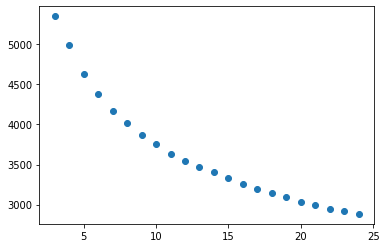

In [13]:
plt.scatter([i for i in range(3,25)], words_left)
plt.show()

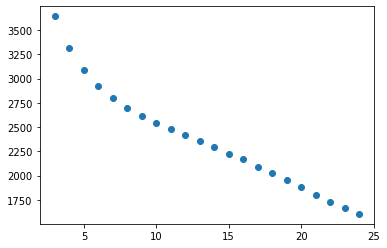

In [14]:
plt.scatter([i for i in range(3,25)], words_left_sec)
plt.show()

In [15]:
temp_short = data20[count < 12]

In [16]:
temp_long = data20[count >= 12]

# 4.5% of the samples contained information we would want to keep

In [17]:
temp_long.head()

,date,debate_name,debate_section,speaker,speech,speaking_time_seconds,candidate
0,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah ODonnell,Good evening and welcome the Democratic presid...,8.0,False
1,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Gayle King,And Super Tuesday is just a week away and this...,22.0,False
2,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah ODonnell,And CBS News is proud to bring you this debate...,14.0,False
3,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Gayle King,And we are partnering tonight also with Twitte...,10.0,False
4,02-25-2020,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah ODonnell,Now here are the rules for the next two hours....,31.0,False


# Lemmatize etc.

In [18]:
def get_mappings(ending, mapped_to, stems):
    return {stem + "'" + ending: stem + " " + mapped_to for stem in stems}
def get_contractions(ending, mapped_to, stems):
    return list(get_mappings(ending, mapped_to, stems).keys())

is_contractions = get_contractions("s", "is", ["he", "she", "it", "what", "that", "there", "here"])

In [19]:
temp_long.insert(len(temp_long.columns), 'preprocessed_speech', '')
for contraction in is_contractions:
    temp_long.loc[:,'preprocessed_speech'] = [re.sub(contraction, "", s) for s in temp_long['speech']] # remove is contractions
temp_long.loc[:,'preprocessed_speech'] = [re.sub("'s", "", s) for s in temp_long['preprocessed_speech']] # delete 's
temp_long.loc[:,'preprocessed_speech'] = [re.sub("(\w+'\w+)", "", s) for s in temp_long['preprocessed_speech']] # remove any contraction


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
import string

def custom_lemmatize(words):
    for word, tag in pos_tag([words]):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
        else:
            lemma = ps.lemmatize(word, wntag)
    return lemma

def extract_words(sentence, ignore_words):
    words = nltk.word_tokenize(sentence)
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    words_cleaned = [custom_lemmatize(''.join(filter(str.isalpha, w)).lower()) for w in words if (not any(map(str.isdigit, w)) and len(w)>2)]
    return list(filter(lambda s: s not in our_stopwords, words_cleaned))
#     return words_cleaned  


def tokenize_sentences(sentences):
    words = []
    for sentence in sentences:
        w = extract_words(sentence, our_stopwords)
        words.extend(w)
        
    counts = dict(Counter(words))
    return counts


def bagofwords(sentence, words):
    sentence_words = extract_words(sentence, our_stopwords)
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

# dictionary should be a map from word to index
def sparseBOW(sentence, dictionary):
    sentence_words = extract_words(sentence, our_stopwords)
    word_counts = dict(Counter(sentence_words))
    result = []
    index = 0
    for word, count in word_counts.items():
        result.append((word, count))
        index += 1
    return result


def createDictionary(words):
    words = set(words)
    index = 0
    dictionary = {}
    for word in words:
        dictionary[word] = index
        index += 1
    return dictionary


In [23]:
# counts = tokenize_sentences(temp_long.speech)

In [24]:
# values = list(counts.values())
# vocab = list(counts.keys())
# values, vocab = zip(*sorted(zip(values, vocab)))

In [25]:
# dictionary = createDictionary(vocab)

In [26]:
def make_preprocessed_speech_col(ignore_words):
    temp_long.loc[:,'preprocessed_speech'] = temp_long.preprocessed_speech.map(
        lambda s: ' '.join(extract_words(s.strip(), ignore_words)))

In [27]:
# temp_long.preprocessed_speech

In [28]:
make_preprocessed_speech_col(our_stopwords)
all_words = [s.split() for s in temp_long.preprocessed_speech]
all_words = [word for words in all_words for word in words]
word_counts = dict(Counter(all_words))
print(len(word_counts))
sorted_word_counts = sorted(word_counts.items(), key= lambda item: item[1])
our_stopwords = our_stopwords.union(set(map(lambda item: item[0], 
                                            filter(lambda item: item[1] < 3, sorted_word_counts))))

6701


In [29]:
make_preprocessed_speech_col(our_stopwords)
all_words = [s.split() for s in temp_long.preprocessed_speech]
all_words = [word for words in all_words for word in words]
dictionary = createDictionary(all_words)
print(len(dictionary))

3225


In [31]:
[temp_long.loc[k, 'speech'] for k, s in temp_long.iterrows() if len(s.preprocessed_speech.split()) < 1]
# [temp_long.loc[k, 'preprocessed_speech'] for k, s in temp_long.iterrows() if len(s.preprocessed_speech.split()) < 1]
empty_speeches = [k for k, s in temp_long.iterrows() if len(s.preprocessed_speech.split()) < 1]

In [32]:
temp_long.drop(empty_speeches, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
# temp_long.speech.loc[temp_long.index == 15].iloc[0]

In [34]:
# s = temp_long.speech.loc[temp_long.index == 13].iloc[0]
# # re.sub("(\w+'\w+)", "", s)
# ' '.join(extract_words(s))

In [44]:
data20.iloc[15].speech

"I'll tell you what the Russians want. They don't have a political party. They want chaos and chaos is what is coming our way. I mean look if you think the last four years has been chaotic divisive toxic exhausting imagine spending the better part of 2020 with Bernie Sanders versus Donald Trump. Think about what that will be like for this country. And meanwhile folks at home from South Carolina to South Bend are trying to figure out what any of this means for us. Because it's right that there is a progressive majority an American majority that wants to see real change wants to see wages go up and go up faster than the cost of health and saving for retirement. But also there's the majority of the American people who I think right now just to be able to turn on the TV see their President and actually feel their blood pressure go down a little bit instead of up through the roof. We have an opportunity to set a different tone."

In [53]:
temp_long.iloc[15].preprocessed_speech

'progressive progressive walk distance mother church nine shot dead white supremacist bernie vote five brady bill monitor wait period finish wait period hour responsible nine death man able weapon wait period suggest addition progressive thought barack obama primary primary barack obama administration folk progressive progressive'

# Saving csvs

In [54]:
# temp_long.to_csv("debates_2020_updated.csv")

In [55]:
cols = {"word": []}#, "index": []}
for word, k in dictionary.items():
    cols['word'].append(word)
#     cols['index'].append(k)
dictionary_df = pd.DataFrame(cols)
# dictionary_df.to_csv("dictionary.csv")

### Old Stuff

In [37]:
## bow_representation = [bagofwords(i, vocab) for i in temp_long['speech']]
# bow_representation = [sparseBOW(i, dictionary) for i in temp_long['speech']]

In [38]:
# temp_long['bow_representation'] = bow_representation

In [39]:
# vocab_plus_counts = pd.DataFrame({"vocab": vocab, "counts": values})
# vocab_plus_counts = vocab_plus_counts[vocab_plus_counts['counts'] > 500]
# # vocab_plus_counts.to_csv("vocab.csv")

In [40]:
# for i in range(0, 50):
#     print(str(vocab_plus_counts['vocab'].iloc[i]) + "    " + str(vocab_plus_counts['counts'].iloc[i]))

In [41]:
keeps = [
    'abolish',
    'bailout',
    'assassination',
    'autopay',
    'beijing',
    'betray',
    'betrayal',
    'aclu',
] # 50

In [42]:
# pd.DataFrame({"stopwords": list(our_stopwords)}).to_csv("stopwords.csv")